In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import os
from PIL import Image

<h1> Genuses prediction

In [14]:
genus = pd.read_csv("data/genus_with_image.csv")

In [15]:
classes = {}
l = 0
for i in genus.Genus:
    classes[i] = l
    l += 1

In [80]:
def load_flowers_data():
    imgs = []
    labels = []
    data_path = 'images_per_genus/'
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                tmp = np.array(image)
                if tmp.shape != (256,256,3):
                    print(tmp)
                else:
                    imgs.append(tmp)
                    labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels)
    num_c = len(y[0])

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]
    #X = X/256.

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [113]:
# CALL load_flowers_data WITH YOUR PREFERRED METHOD HERE
# $DELETE_BEGIN
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data()
# $DELETE_END

100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 44.85it/s]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 46.68it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
 86%|███████████████████████████████████      | 257/300 [00:05<00:00, 45.56it/s]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


 71%|██████████████████████████████▎            | 12/17 [00:00<00:00, 53.51it/s]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


 32%|█████████████▎                            | 35/110 [00:00<00:01, 44.90it/s]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


 87%|█████████████████████████████████████▎     | 39/45 [00:00<00:00, 41.40it/s]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 41.52it/s]


In [84]:
print(X_train.shape, X_val.shape, X_test.shape)

(4152, 256, 256, 3) (1311, 256, 256, 3) (1092, 256, 256, 3)


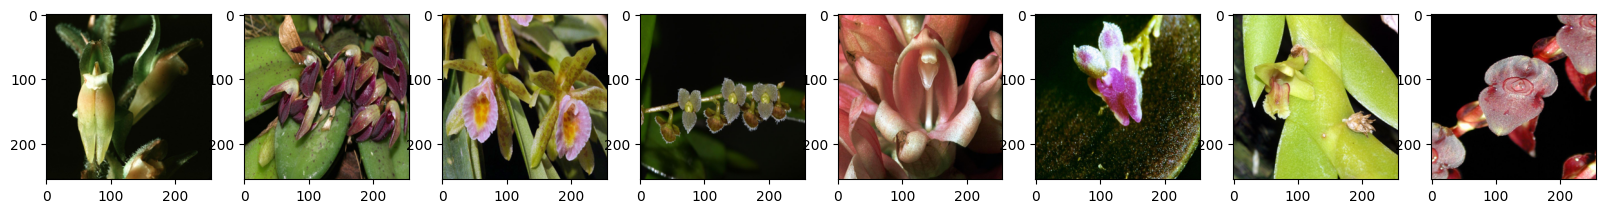

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i+100])

<h2> CNN network

In [89]:
y_train.shape[1]

359

In [90]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_own_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(y_train.shape[1], activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [91]:
model_homemade = load_own_model()
model_homemade.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 247, 247, 16)      4816      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        3

In [93]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model_homemade.fit(X_train, y_train,
                             validation_data = (X_val, y_val),
                             batch_size = 32, 
                             epochs = 100, 
                             callbacks=[es])

Epoch 1/100
130/130 [==============================] - 443s 3s/step - loss: 5.2502 - accuracy: 0.0441 - val_loss: 4.9283 - val_accuracy: 0.0557
Epoch 2/100
130/130 [==============================] - 455s 3s/step - loss: 4.8302 - accuracy: 0.0600 - val_loss: 4.7828 - val_accuracy: 0.0648
Epoch 3/100
 12/130 [=>............................] - ETA: 6:00 - loss: 4.7598 - accuracy: 0.0703

KeyboardInterrupt: 

In [115]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    # $CHALLENGIFY_BEGIN
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    # $CHALLENGIFY_END
    
    return model

In [116]:
model = load_model()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [117]:
def set_nontrainable_layers(model):
    
    # $CHALLENGIFY_BEGIN
    # Set the first layers to be untrainable
    model.trainable = False
    
    # $CHALLENGIFY_END
    
    return model

In [118]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(359, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [119]:
model = add_last_layers(model)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 500)               16384500  
                                                                 
 dense_13 (Dense)            (None, 359)               179859    
                                                                 
Total params: 31,279,047
Trainable params: 16,564,359
Non-trainable params: 14,714,688
_________________________________________________________________


In [120]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [121]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [122]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [123]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
260/260 [==============================] - 8425s 32s/step - loss: 6.5346 - accuracy: 0.1587 - val_loss: 4.6742 - val_accuracy: 0.2105
Epoch 2/50
260/260 [==============================] - 2252s 9s/step - loss: 1.3329 - accuracy: 0.7026 - val_loss: 5.0074 - val_accuracy: 0.2510
Epoch 3/50
260/260 [==============================] - 2254s 9s/step - loss: 0.1922 - accuracy: 0.9634 - val_loss: 5.1163 - val_accuracy: 0.2670
Epoch 4/50
 51/260 [====>.........................] - ETA: 22:18 - loss: 0.0197 - accuracy: 0.9975

KeyboardInterrupt: 

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [125]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator


In [128]:
X_train[0]

array([[[ 10.060997  ,  -7.7789993 , -13.68      ],
        [  9.060997  , -12.778999  , -17.68      ],
        [  6.060997  , -22.779     , -26.68      ],
        ...,
        [-37.939003  , -56.779     , -58.68      ],
        [-35.939003  , -54.779     , -56.68      ],
        [-35.939003  , -54.779     , -56.68      ]],

       [[ 25.060997  ,   7.2210007 ,   1.3199997 ],
        [ 22.060997  ,   0.22100067,  -4.6800003 ],
        [ 16.060997  , -12.778999  , -16.68      ],
        ...,
        [-37.939003  , -56.779     , -58.68      ],
        [-35.939003  , -54.779     , -56.68      ],
        [-35.939003  , -54.779     , -56.68      ]],

       [[ 38.060997  ,  19.221     ,  13.32      ],
        [ 34.060997  ,  11.221001  ,   6.3199997 ],
        [ 27.060997  ,  -1.7789993 ,  -5.6800003 ],
        ...,
        [-37.939003  , -56.779     , -58.68      ],
        [-35.939003  , -54.779     , -56.68      ],
        [-35.939003  , -54.779     , -56.68      ]],

       ...,

      

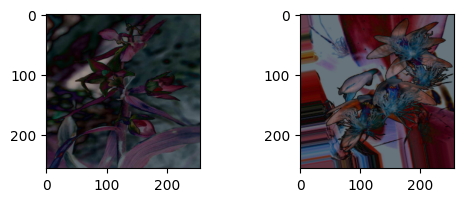

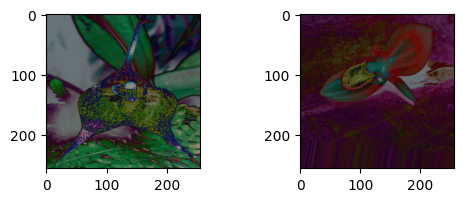

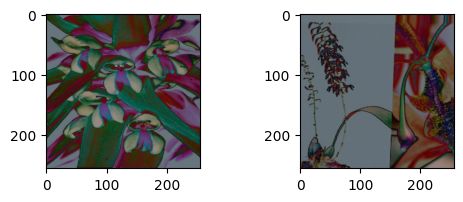

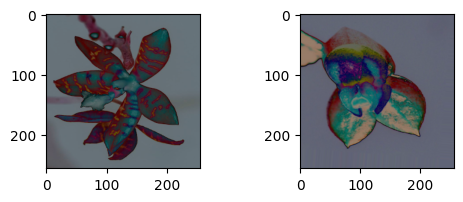

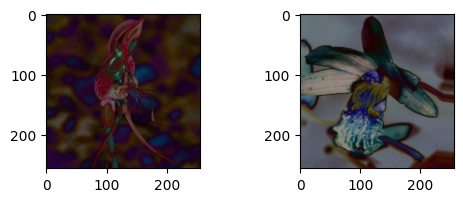

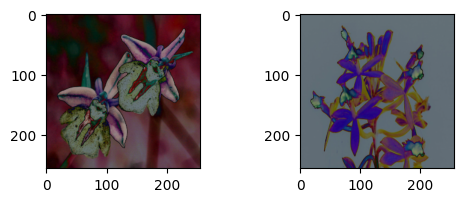

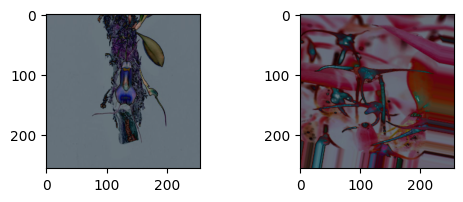

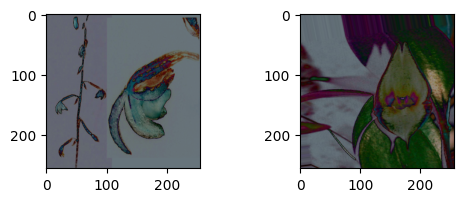

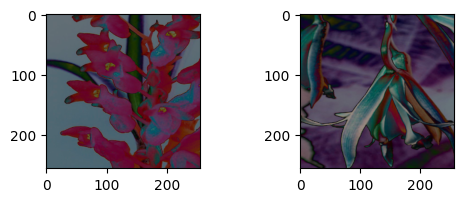

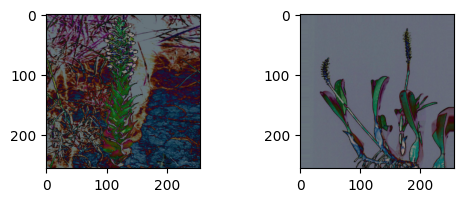

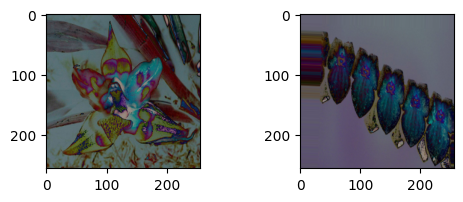

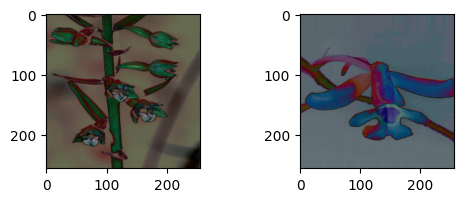

In [130]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(abs(raw_image)/255)
    ax2.imshow(abs(augmented_image[0])/255)
    plt.show()
    
    if i > 10:
        break

In [131]:
train_flow = datagen.flow(X_train, y_train, batch_size = 64)

In [1]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()
    
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(train_flow, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    callbacks=[es])

2022-11-21 08:20:24.438327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'build_model' is not defined